In [57]:
from json import load
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import transforms
from math import cos, sin, pi
from glob import glob

from skimage import transform, io
from scipy.ndimage import rotate
%matplotlib inline

In [58]:
glob("*.json")

['07c2c6e2-3717-4381-96a7-eb5e522dedae.json',
 '8beea9d8-2167-4f7d-b140-56bab55bf2aa.json',
 'e68b03ff-4c6a-4c86-b4e9-d41d39160d9b.json']

In [59]:
meta = load(open(glob("*.json")[0]))

In [60]:
grid = meta['grid']
iscale = meta['scale']

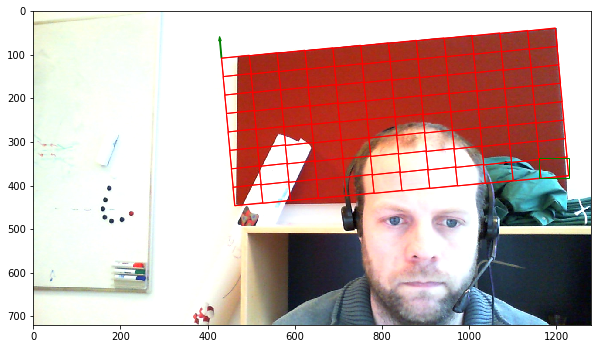

In [164]:
im = plt.imread(glob("*.png")[0])
scale = im.shape[1]/iscale
fig,ax = plt.subplots(1, figsize=(10,20))
ax.imshow(im)
rect = patches.Rectangle((grid['left']*scale,grid['top']*scale),width=grid['width']*grid['scaleX']*scale,height=grid['height']*grid['scaleY']*scale,angle=grid['angle'],linewidth=1,edgecolor='r',facecolor='none')
ar_pa = patches.Arrow(grid['left']*scale, grid['top']*scale, cos(((grid['angle']-90)/360)*(2*pi))*50, sin(((grid['angle']-90)/360)*(2*pi))*50, color = 'green', width=10)
ax.add_patch(ar_pa)
ax.add_patch(rect)

grid_size = max(grid['width']/12, grid['height']/12)
width=grid_size*grid['scaleX']
height=grid_size*grid['scaleY']
ori_x = grid['left']*scale
ori_y = grid['top']*scale
angle = (grid['angle']/360)*2*pi

for row in range(8):
    for col in range(12):        
        dx = ori_x+width*col*cos(angle)-height*row*sin(angle)
        dy = ori_y+width*col*sin(angle)+height*row*cos(angle)
        mrect = patches.Rectangle((dx, dy), width=width, height=height, angle=-angle,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(mrect)

#bb = mrect.get_patch_transform().transform(mrect.get_path().vertices[:-1])
#bb_x_min = coo[:,0].min()
#bb_x_max = coo[:,0].max()
#bb_y_min = coo[:,1].min()
#bb_y_max = coo[:,1].max()
dx1 = ori_x+width*col*cos(angle)-height*row*sin(angle)
dx2 = ori_x+width*(col)*cos(angle)-height*(row+1)*sin(angle)
dx3 = ori_x+width*(col+1)*cos(angle)-height*(row+1)*sin(angle)
dx4 = ori_x+width*(col+1)*cos(angle)-height*row*sin(angle)
dxs = [dx1,dx2,dx3,dx4]
dy1 = ori_y+width*col*sin(angle)+height*row*cos(angle)
dy2 = ori_y+width*col*sin(angle)+height*(row+1)*cos(angle)
dy3 = ori_y+width*(col+1)*sin(angle)+height*(row+1)*cos(angle)
dy4 = ori_y+width*(col+1)*sin(angle)+height*row*cos(angle)
dys = [dy1,dy2,dy3,dy4]

bb_rect = patches.Rectangle((min(dxs), min(dys)), width=max(dxs)-min(dxs), height=max(dys)-min(dys), linewidth=1,edgecolor='g',facecolor='none')
ax.add_patch(bb_rect)
plt.show()

In [162]:
abs(dx-dx2)

67.59614956632709

In [147]:
coo = mrect.get_patch_transform().transform(mrect.get_path().vertices[:-1])

In [160]:
dx2 = ori_x+width*(col+1)*cos(angle)-height*(row+1)*sin(angle)


array([[[0.5294118 , 0.1882353 , 0.1254902 , 1.        ],
        [0.5294118 , 0.18431373, 0.13725491, 1.        ],
        [0.53333336, 0.1882353 , 0.14901961, 1.        ],
        ...,
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ]],

       [[0.52156866, 0.18431373, 0.1254902 , 1.        ],
        [0.5254902 , 0.1882353 , 0.13725491, 1.        ],
        [0.5294118 , 0.19215687, 0.14509805, 1.        ],
        ...,
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ]],

       [[0.5372549 , 0.19607843, 0.14901961, 1.        ],
        [0.5372549 , 0.19607843, 0.14901961, 1.        ],
        [0.5372549 , 0.19215687, 0.15294118, 1.        ],
        ...,
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.      

array([[1160.20226576,  341.54010693],
       [1223.90814191,  334.62579246],
       [1228.49178858,  376.85777777],
       [1164.78591243,  383.77209224]])

In [116]:
im[10:12, 20:24]

array([[[0.99215686, 1.        , 0.8980392 , 1.        ],
        [0.99215686, 1.        , 0.8980392 , 1.        ],
        [0.99215686, 1.        , 0.8980392 , 1.        ],
        [0.99215686, 1.        , 0.8980392 , 1.        ]],

       [[0.99215686, 1.        , 0.8980392 , 1.        ],
        [0.99215686, 1.        , 0.8980392 , 1.        ],
        [0.99215686, 1.        , 0.8980392 , 1.        ],
        [0.99215686, 1.        , 0.8980392 , 1.        ]]], dtype=float32)

In [103]:
?coo

Type:           Bbox
String form:    Bbox(x0=1160.2022657619386, y0=341.5401069341775, x1=1224.2822657619386, y1=384.02010693417753)
File:           ~/.pyenv/versions/3.7.2/envs/scipy/lib/python3.7/site-packages/matplotlib/transforms.py
Docstring:      A mutable bounding box.
Init docstring:
Parameters
----------
points : ndarray
    A 2x2 numpy array of the form ``[[x0, y0], [x1, y1]]``.

Notes
-----
If you need to create a :class:`Bbox` object from another form
of data, consider the static methods :meth:`unit`,
:meth:`from_bounds` and :meth:`from_extents`.


In [104]:
coo.get_points()

array([[1160.20226576,  341.54010693],
       [1224.28226576,  384.02010693]])

In [106]:
coo.intervaly

array([341.54010693, 384.02010693])

In [107]:
coo.xmin

1160.2022657619386